<a href="https://colab.research.google.com/github/AlessioAccardo/machine_learning/blob/main/Es1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def classifica_email_gratis_manuale(email_text):

  # Probabilità a priori (Prior) - Stimate dai dati ipotetici iniziali
  p_spam = 0.1                      # P(Spam)
  p_non_spam = 0.9                  # P(Non Spam)

  # Verosimiglianze (Likelihood) - Stimate dai dati ipotetici iniziali
  p_gratis_dato_spam = 0.8          # P("GRATIS"|Spam)
  p_gratis_dato_non_spam = 0.11     # P("GRATIS"|Non Spam)

  # Verifica se la parola "GRATIS" è presente nell'email (case-sensitive)
  if "gratis" in email_text.lower():
    parola_gratis_presente = True
  else:
    parola_gratis_presente = False

  if parola_gratis_presente:
    # Calcola il numeratore del Teorema di Bayes per Spam e Non Spam
    numeratore_spam = p_gratis_dato_spam * p_spam
    numeratore_non_spam = p_gratis_dato_non_spam * p_spam

    if numeratore_spam > numeratore_non_spam:
      return "Spam"
    else:
      return "Non Spam"
  else:
    if p_spam > p_non_spam:
      return "Spam"
    else:
      return "Non Spam"

# Esempi di email da classificare
email1 = "Offerta speciale! Vinci un premio GRATIS"
email2 = "Ciao, come stai? Tutto bene oggi?"
email3 = "Scopri i nuovi prodotti in offerta."
email4 = "GRATIS solo per te!"

# Classifica le email e stampa i risultati
print(f"Email '{email1}' classificata come => {classifica_email_gratis_manuale(email1)}")
print(f"Email '{email2}' classificata come => {classifica_email_gratis_manuale(email2)}")
print(f"Email '{email3}' classificata come => {classifica_email_gratis_manuale(email3)}")
print(f"Email '{email4}' classificata come => {classifica_email_gratis_manuale(email4)}")




Email 'Offerta speciale! Vinci un premio GRATIS' classificata come => Spam
Email 'Ciao, come stai? Tutto bene oggi?' classificata come => Non Spam
Email 'Scopri i nuovi prodotti in offerta.' classificata come => Non Spam
Email 'GRATIS solo per te!' classificata come => Spam


Accuratezza del classificatore Naive Bayes: 1.00
Email: 'Hai vinto un buono Amazon da 500 euro! Clicca qui ...' -> Classificata come: Spam
Email: 'Ciao, ti volevo chiedere se hai visto quel film ch...' -> Classificata come: No Spam
Email: 'Offerta lampo! Smart TV 4K a metà prezzo solo per ...' -> Classificata come: Spam
Email: 'Domani dobbiamo andare a prendere i bambini a scuo...' -> Classificata come: No Spam


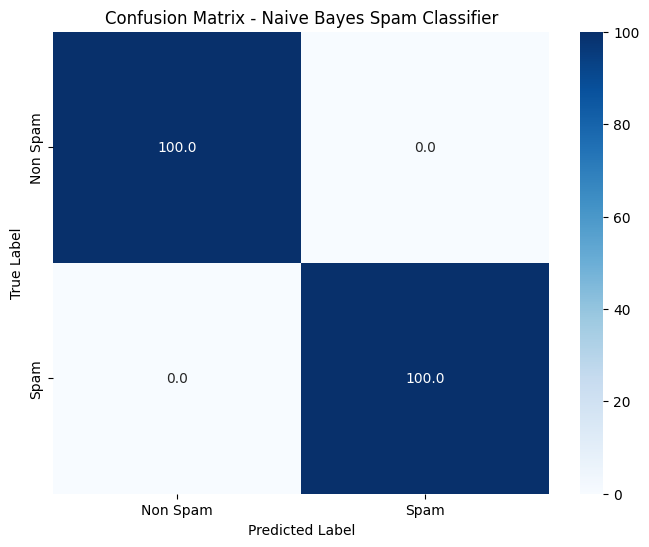

In [6]:
import csv
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



testi = []
etichette = []

with open('email_dataset_2.csv', 'r', encoding='utf-8') as csvfile:
  reader = csv.DictReader(csvfile)            # Usa DictReader per accedere alle colonne per nome
  for row in reader:
    testi.append(row['text'])                 # Aggiungi il testo dell'email alla lista 'testi'
    etichette.append(int(row['label']))       # Aggiungi l'etichetta (convertita in intero) alla lista 'etichette'

# 1. Vettorizzazione del testo (trasformare il testo in numeri)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(testi)

y = etichette

# 2. Dividere i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 3. Creare e addestrare il classificatore Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 4. Fare previsioni sul test set
y_pred = clf.predict(X_test)

# 5. Valutare l'accuratezza del classificatore
accuratezza = accuracy_score(y_test, y_pred)
print(f"Accuratezza del classificatore Naive Bayes: {accuratezza:.2f}")

# 6. Provare a classificatore nuove email (esempi)
nuove_email = [
    "Hai vinto un buono Amazon da 500 euro! Clicca qui per riscuotere!",
    "Ciao, ti volevo chiedere se hai visto quel film che ti ho consigliato.",
    "Offerta lampo! Smart TV 4K a metà prezzo solo per oggi!",
    "Domani dobbiamo andare a prendere i bambini a scuola alle 16:30."
]

nuove_email_vettorizzate = vectorizer.transform(nuove_email)

previsioni = clf.predict(nuove_email_vettorizzate)

for i, email in enumerate(nuove_email):
  if previsioni[i] == 1:
    print(f"Email: '{email[:50]}...' -> Classificata come: Spam")
  else:
    print(f"Email: '{email[:50]}...' -> Classificata come: No Spam")

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]   # Calcola la matrice di confusione confrontando le previsioni con i valori reali

plt.figure(figsize=(8,6))   # Crea una nuova figura con dimensioni 8x6 pollici

class_names = ["Non Spam", "Spam"]    # Definisci i nomi delle classi per spam e non spam

sns.heatmap(conf_matrix_norm * 100, annot=True, cmap='Blues', fmt='.1f', xticklabels=class_names, yticklabels=class_names)
# Crea una heatmap della matrice di confusione utilizzando seaborn.
# annot=True: mostra i valori numerici in ogni cella
# cmap='Blues': usa la palette di colori Blues
# fmt='.1f': formatta i numeri come float con una cifra decimale
# xticklabels=class_names: etichette per l'asse x (classi predette)
# yticklabels=class_name: etichette per l'asse y (classi reali)

plt.xlabel('Predicted Label')     # Imposta l'etichetta dell'asse x come 'Predicted Label'
plt.ylabel('True Label')          # Imposta l'etichetta dell'asse y come 'True Label'
plt.title('Confusion Matrix - Naive Bayes Spam Classifier')
# Titolo più descrittivo
# Imposta il titolo del grafico come 'Confusion Matrix'.

plt.show()       # Mostra il grafico.

